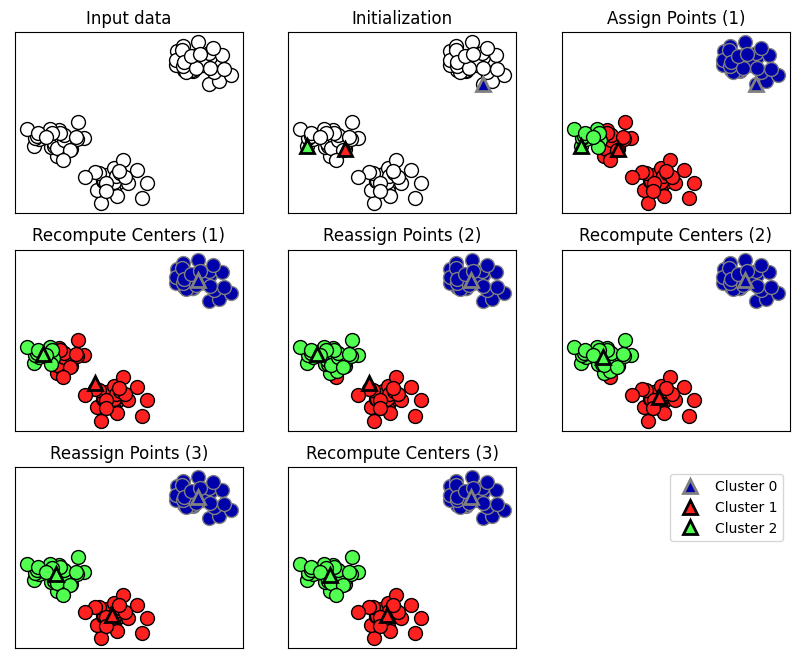

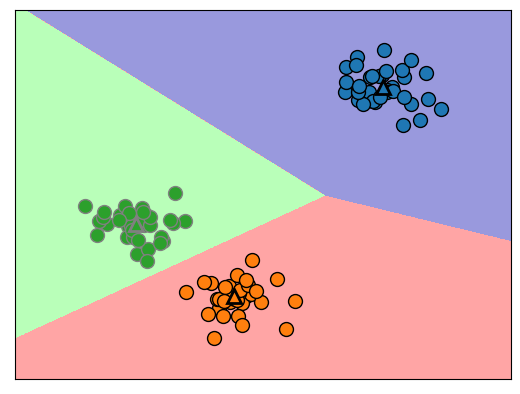

Принадлежность к кластерам:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


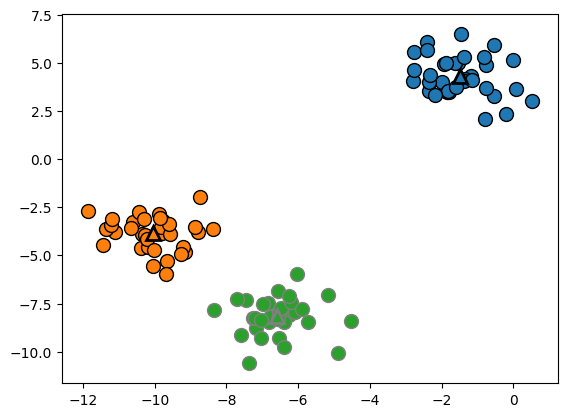

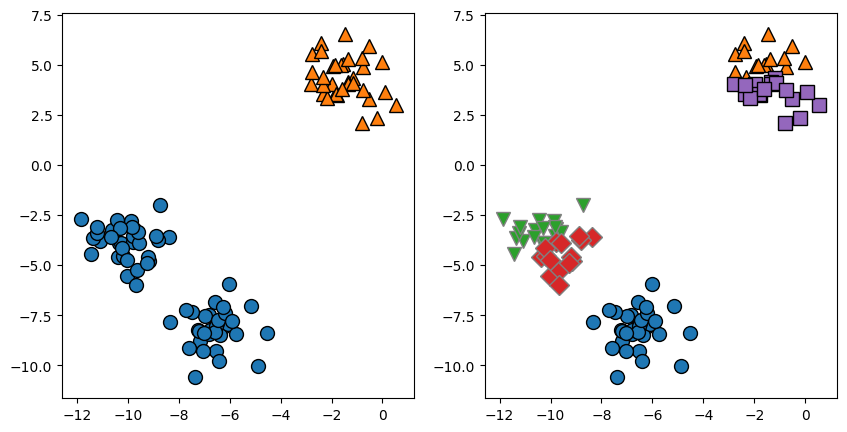

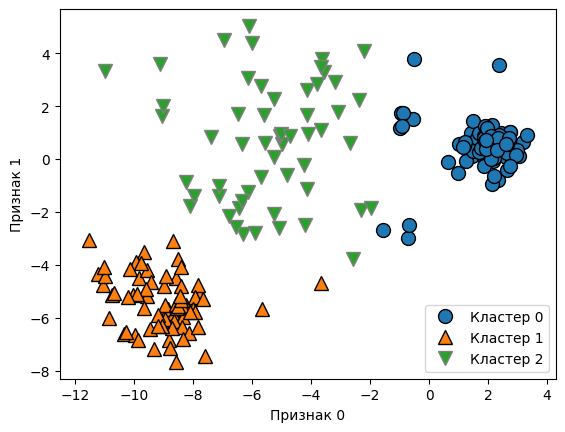

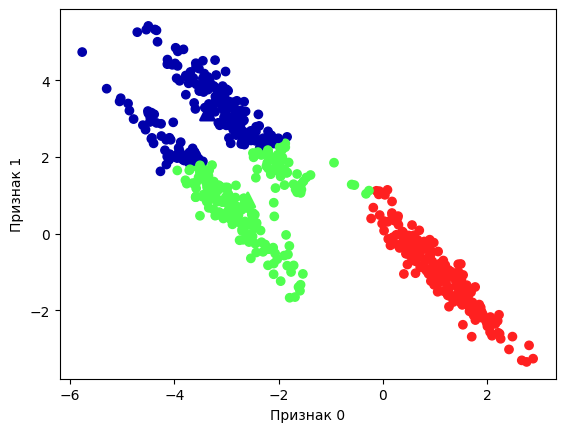

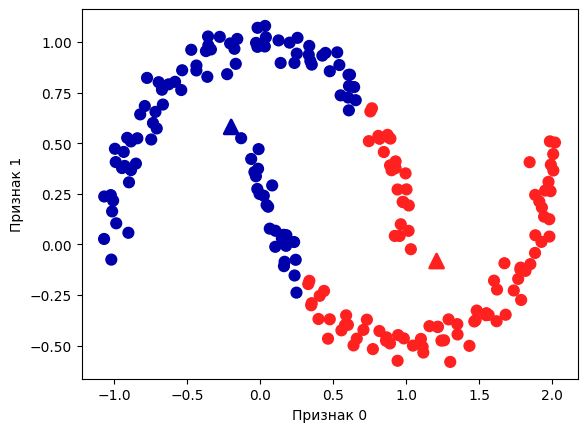

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans


def plot_kmeans_show():
    mglearn.plots.plot_kmeans_algorithm()
    plt.show()

    mglearn.plots.plot_kmeans_boundaries()
    plt.show()


def make_blobs_show():
    X, y = make_blobs(random_state=1)
    kmeans = KMeans(n_clusters=3).fit(X)

    print(f'Принадлежность к кластерам:\n{kmeans.labels_}')

    mglearn.discrete_scatter(X[:, 0], X[:, 1],
                             kmeans.labels_, markers='o')
    mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                             [0, 1, 2], markers='^', markeredgewidth=2)
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    kmeans = KMeans(n_clusters=2).fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

    kmeans = KMeans(n_clusters=5).fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
    plt.show()

    X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
    y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
    mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

    plt.legend(['Кластер 0',
                'Кластер 1',
                'Кластер 2'], loc='best')
    plt.xlabel('Признак 0')
    plt.ylabel('Признак 1')
    plt.show()


def make_blobs_random_show():
    X, y = make_blobs(random_state=170, n_samples=600)
    rng = np.random.RandomState(74)

    transformation = rng.normal(size=(2, 2))
    X = np.dot(X, transformation)

    kmeans = KMeans(n_clusters=3).fit(X)
    y_pred = kmeans.predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                marker='^', c=[0, 1, 2], s=100, linewidths=2,
                cmap=mglearn.cm3)
    plt.xlabel('Признак 0')
    plt.ylabel('Признак 1')
    plt.show()


def make_moons_show():
    X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

    kmeans = KMeans(n_clusters=2).fit(X)
    y_pred = kmeans.predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)],
                s=100, linewidths=2)
    plt.xlabel('Признак 0')
    plt.ylabel('Признак 1')
    plt.show()


def main():
    plot_kmeans_show()
    make_blobs_show()
    make_blobs_random_show()
    make_moons_show()


main()